In [50]:
df.head()

,USER ID,活动类型,活动名称,活动要求学习时间(seconds),活动章节,章节预计学习时间(seconds),访问时间(datetime),访问时长(seconds),高过门槛时长
0,1625,quiz,课程前测,0,导言,0,2020-09-11T05:48:12.749Z,835,835
1,24539,quiz,课程前测,0,导言,0,2020-09-11T05:51:53.341Z,2786,2786
2,24581,quiz,课程前测,0,导言,0,2020-09-11T05:53:40.887Z,273,273
3,24581,video,学一学：人工智能应用示例（一）,120,第一讲 直观感受——人工智能应用示例（一）,180,2020-09-11T05:58:44.135Z,214,94
4,1625,video,学一学：人工智能现状——第三次热潮,300,第二讲 了解人工智能现状：第三次热潮,420,2020-09-11T06:02:11.533Z,568,268


In [1]:
import pandas as pd
import numpy as np
import statistics 
import random

pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 88)

df = pd.read_excel("C1 - t1.xlsx")

a1 = df.reindex(columns=['访问时长(seconds)'])
a1 = a1.values
a2 = df.reindex(columns=['活动要求学习时间(seconds)'])
a2 = a2.values

a = a1 -a2
df['高过门槛时长'] = a


user = df['USER ID'].unique()
user = list(user)
len(user)

user.remove(24632) 
user.remove(24702) 

rf = pd.read_excel("C1 - t2.xlsx")
rf.set_index('USER ID', inplace=True)
rf = rf.reindex(user)

In [2]:
len(user)

52

In [3]:
rf

,完成进度,累计时间(hours),学习次数,Percentile,结业考试成绩
USER ID,,,,,
1625,1.00,9.68,70,0.981,27
24539,0.38,5.44,36,0.907,0
24581,0.97,2.09,62,0.352,30
24586,1.00,2.71,65,0.500,27
24585,1.00,2.52,79,0.444,18
8976,1.00,1.76,64,0.222,15
24603,1.00,2.71,69,0.519,15
24606,1.00,1.71,60,0.204,27
24589,0.97,1.62,57,0.130,27


In [4]:
activities = df['活动名称'].unique()
activities = list(activities)
activities

['课程前测',
 '学一学：人工智能应用示例（一）',
 '学一学：人工智能现状——第三次热潮',
 '补充资料：波士顿动力机器人',
 '第一讲 学习体验问卷',
 '解释型AI的决策应用调查表',
 '延伸阅读：人工智能的历史现状与未来（选修）',
 '第二讲 学习体验问卷',
 '学一学：人工智能现状：AI版“双手互搏”有多牛？',
 '第三讲 学习体验问卷',
 '学一学：人工智能应用示例（二）',
 '第四讲 学习体验问卷',
 '学一学：人工智能的突破与不确定性',
 '第五讲 学习体验问卷',
 '学一学：视觉错觉（一）视力之谜',
 '延伸阅读：颠倒的视觉',
 '第六讲 学习体验问卷',
 '学一学：视觉错觉（二）颜色错觉',
 '第七讲 学习体验问卷',
 '学一学：视觉错觉（三）先验错觉',
 '延伸阅读：看得见的斑点狗',
 '延伸阅读：火星人脸的阴影',
 '第八讲 学习体验问卷',
 '学一学：声音与视听错觉',
 '延伸阅读：听觉错觉与语音、歌唱的智能分析',
 '第九讲 学习体验问卷',
 '学一学：空间错觉  二维',
 '学一学：空间错觉  三维',
 '第十讲 学习体验问卷',
 '学一学：语言错觉',
 '第十一讲 学习体验问卷',
 '学一学：其他错觉',
 '学一学：思考与小结',
 '第十二讲 学习体验问卷',
 '想一想：课程回顾',
 '延伸阅读：我思故我在？（选修）',
 '第十三讲 学习体验问卷',
 '第十四讲 学习体验问卷',
 '课程整体回顾问卷',
 '测一测：人工智能与错觉，你明白了吗？']

In [5]:
len(activities)

40

In [6]:
USER_ID = {}
for i in user:
     USER_ID[i] = df.loc[df['USER ID'] == i]


c1 = np.array([196, 537, 170, 344, 399, 845, 381, 257, 354, 1027, 716, 676, 1007, 381, 139])
c2 = np.array([5, 5, 9, 20, 42])
c3 = np.array([53, 6, 3, 3, 3, 3, 3, 3, 3, 
               3, 3, 3, 3, 3, 3, 3, 3])
c4 = ['学一学：人工智能应用示例（一）',
    '学一学：人工智能现状——第三次热潮',
    '学一学：人工智能现状：AI版“双手互搏”有多牛？',
    '学一学：人工智能应用示例（二）', 
    '学一学：人工智能的突破与不确定性',
    '学一学：视觉错觉（一）视力之谜',
    '学一学：视觉错觉（二）颜色错觉',
    '学一学：视觉错觉（三）先验错觉',
    '学一学：声音与视听错觉', 
    '学一学：空间错觉  二维',
    '学一学：空间错觉  三维',
    '学一学：语言错觉',
    '学一学：其他错觉',
    '学一学：思考与小结',
    '补充资料：波士顿动力机器人']
c5 = ['延伸阅读：颠倒的视觉', 
    '延伸阅读：看得见的斑点狗',
    '延伸阅读：火星人脸的阴影', 
    '延伸阅读：听觉错觉与语音、歌唱的智能分析', 
    '想一想：课程回顾']
c6 = ['课程前测', 
    '解释型AI的决策应用调查表', 
    '第一讲 学习体验问卷',
    '第二讲 学习体验问卷',
    '第三讲 学习体验问卷',
    '第四讲 学习体验问卷',
    '第五讲 学习体验问卷',
    '第六讲 学习体验问卷',
    '第七讲 学习体验问卷',
    '第八讲 学习体验问卷',
    '第九讲 学习体验问卷',
    '第十讲 学习体验问卷',
    '第十一讲 学习体验问卷',
    '第十二讲 学习体验问卷',
    '第十三讲 学习体验问卷',
    '第十四讲 学习体验问卷',
    '课程整体回顾问卷']

In [7]:
import scipy.stats as ss

C2_dictionary = {}
duplicate = {'访问时长(seconds)':'sum', '高过门槛时长':'sum'}

for k , i in zip(range(52), user): 
    C2_dictionary["LEARNER{0}".format(i)] = []
    
    USER_ID[i].reset_index(inplace=True)
    USER_ID[i].set_index('活动名称', inplace=True)
    
    USER_ID[i] = USER_ID[i].groupby('活动名称').agg(duplicate).reindex(columns=['访问时长(seconds)', '高过门槛时长'])

    Time_V = USER_ID[i].reindex(c4, columns =['访问时长(seconds)']).values    #视频观看时长
    Time_V = list(np.nan_to_num(Time_V).flatten())
    
    Time_T = USER_ID[i].reindex(c5, columns =['访问时长(seconds)']).values    #文本阅读时长
    Time_T = list(np.nan_to_num(Time_T).flatten())

    Time_H = USER_ID[i].reindex(c6, columns =['访问时长(seconds)']).values    #作业花费时长
    Time_H = list(np.nan_to_num(Time_H).flatten())
    
    #Grit

    #Self-control
    Self_control1 = Time_V[9]    #("最长视频"观看时长)
    Self_control2 = Time_T[4]    #("最多页文本"阅读时长)
    Self_control3 = Time_H[0]    #("最多题作业"花费时长)

    Self_control4 = USER_ID[i].reindex(columns =['访问时长(seconds)']).values    #单一课件一次(不中断)学习最长时长
    Self_control4 = np.nan_to_num(Self_control4)
    Self_control4 = Self_control4.max()

    Self_control5 = USER_ID[i].reindex(columns = ['访问时长(seconds)']).values    #平均登入時長
    Self_control5 = np.nan_to_num(Self_control5)
    Self_control5 = Self_control5.sum() 
    LOGIN = rf.iloc[k, 2]
    Self_control5 = Self_control5 / LOGIN

    #Engagement
    Engagement1 = USER_ID[i].reindex(columns =['访问时长(seconds)'])    
    Engagement1 = np.nan_to_num(Engagement1).sum()    #学习总时长
    Engagement2 = LOGIN    #学习次数(登入次数)
    Engagement3 = rf.iloc[k, 4]    #结业考试成绩(30%)*

    #Meta-cognitive Self-regulation
    Metacognitive_Self_regulation1 = Time_V[13]    #视频"课程回顾"花费时间
    Metacognitive_Self_regulation2 = Time_T[4]    #课件"课程回顾"花费时间
    Metacognitive_Self_regulation3 = Time_H[16]    #作业"课程回顾"花费时间

    #Self-perception
   
    
    #Motivation
    Motivation1 = USER_ID[i].reindex(columns =['高过门槛时长']).values
    Motivation1 = np.nan_to_num(Motivation1).sum()    #高过门槛时长总和

    Motivation2 = np.array(USER_ID[i].reindex(['延伸阅读：人工智能的历史现状与未来（选修）', '延伸阅读：我思故我在？（选修）'], columns = ['访问时长(seconds)']).values).flatten()
    Motivation2 = np.nan_to_num(Motivation2).sum()    #选修阅读时长

    Motivation3 = rf.iloc[k, 0]    #完成进度*
    
    
    C2_dictionary["LEARNER{0}".format(i)].append(Time_V + Time_T + Time_H + 
                                             [Self_control1,
                                             Self_control2,
                                             Self_control3,
                                             Self_control4,
                                             Self_control5,
                                             Engagement1,
                                             Engagement2,
                                             Engagement3,
                                             Metacognitive_Self_regulation1,
                                             Metacognitive_Self_regulation2,
                                             Metacognitive_Self_regulation3,
                                             Motivation1,
                                             Motivation2,
                                             Motivation3])


In [8]:
C2_dictionary.items()

dict_items([('LEARNER1625', [[367, 568, 186, 1395, 1550, 2951, 2714, 1559, 371, 1190, 2771, 3401, 1509, 426, 153, 347, 184, 1393, 135, 729, 835, 113, 29, 20, 8, 14, 16, 15, 11, 9, 12, 16, 12, 9, 9, 10, 15, 1190, 729, 835, 9393, 497.75714285714287, 34843, 70, 27, 426, 729, 15, 29983, 9723, 1.0]]), ('LEARNER24539', [[5221.0, 909.0, 431.0, 911.0, 704.0, 1201.0, 849.0, 355.0, 430.0, 890.0, 554.0, 666.0, 828.0, 438.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1816.0, 2786.0, 609.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 890.0, 1816.0, 2786.0, 5221, 544.3888888888889, 19598, 36, 0, 438.0, 1816.0, 0.0, 15518, 0.0, 0.38]]), ('LEARNER24581', [[214, 562, 179, 220, 360, 855, 255, 209, 237, 617, 536, 396, 649, 3, 144, 330, 137, 685, 139, 124, 273, 22, 7, 12, 16, 14, 10, 21, 15, 25, 11, 15, 12, 9, 9, 10, 11, 617, 124, 273, 855, 121.16129032258064, 7512, 62, 30, 3, 124, 11, 2772, 138.0, 0.97]]), ('LEARNER24586', [[231, 1151, 224, 386, 420, 856, 389, 276, 377, 1142, 829, 688, 593, 

In [9]:
column_names = c4 + c5 + c6 + [ 
                'SC1', 
                'SC2', 
                'SC3', 
                'SC4', 
                'SC5', 
                'E1', 
                'E2', 
                'E3', 
                'MSR1', 
                'MSR2', 
                'MSR3',
                'M1', 
                'M2', 
                'M3']


df_Data_Point = pd.DataFrame(columns = column_names)

In [10]:
for i in user:
    a_series = pd.Series(C2_dictionary['LEARNER' + str(i)][0], index = df_Data_Point.columns)
    df_Data_Point = df_Data_Point.append(a_series, ignore_index=True)


In [11]:
df_Data_Point.index = user

In [12]:
df_Data_Point.head()

,学一学：人工智能应用示例（一）,学一学：人工智能现状——第三次热潮,学一学：人工智能现状：AI版“双手互搏”有多牛？,学一学：人工智能应用示例（二）,学一学：人工智能的突破与不确定性,学一学：视觉错觉（一）视力之谜,学一学：视觉错觉（二）颜色错觉,学一学：视觉错觉（三）先验错觉,学一学：声音与视听错觉,学一学：空间错觉 二维,学一学：空间错觉 三维,...,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3
1625,367.0,568.0,186.0,1395.0,1550.0,2951.0,2714.0,1559.0,371.0,1190.0,2771.0,...,9393.0,497.757143,34843.0,70.0,27.0,426.0,729.0,15.0,29983.0,9723.0,1.00
24539,5221.0,909.0,431.0,911.0,704.0,1201.0,849.0,355.0,430.0,890.0,554.0,...,5221.0,544.388889,19598.0,36.0,0.0,438.0,1816.0,0.0,15518.0,0.0,0.38
24581,214.0,562.0,179.0,220.0,360.0,855.0,255.0,209.0,237.0,617.0,536.0,...,855.0,121.161290,7512.0,62.0,30.0,3.0,124.0,11.0,2772.0,138.0,0.97
24586,231.0,1151.0,224.0,386.0,420.0,856.0,389.0,276.0,377.0,1142.0,829.0,...,1151.0,149.907692,9744.0,65.0,27.0,309.0,209.0,20.0,4884.0,233.0,1.00
24585,235.0,560.0,207.0,363.0,422.0,851.0,385.0,259.0,359.0,1079.0,760.0,...,1079.0,114.784810,9068.0,79.0,18.0,253.0,131.0,13.0,4208.0,305.0,1.00


In [13]:
# Scaling to 0~1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Learners = scaler.fit_transform(df_Data_Point) # axis = 0 = along rows = default ??

# it becomes an array
# make it a dataframe
df_Learners = pd.DataFrame(df_Learners, index = df_Data_Point.index, 
                                          columns = column_names)


In [14]:
df_Learners.head()

,学一学：人工智能应用示例（一）,学一学：人工智能现状——第三次热潮,学一学：人工智能现状：AI版“双手互搏”有多牛？,学一学：人工智能应用示例（二）,学一学：人工智能的突破与不确定性,学一学：视觉错觉（一）视力之谜,学一学：视觉错觉（二）颜色错觉,学一学：视觉错觉（三）先验错觉,学一学：声音与视听错觉,学一学：空间错觉 二维,学一学：空间错觉 三维,...,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3
1625,0.069402,0.493484,0.170486,0.838341,0.362057,1.000000,0.398826,0.590097,0.218879,0.515375,0.366389,...,1.000000,0.724610,1.000000,0.4250,0.9,0.073133,0.401432,0.217391,1.000000,1.000000,1.000000
24539,1.000000,0.789748,0.395050,0.547476,0.163419,0.406981,0.110751,0.101461,0.253687,0.385448,0.073251,...,0.528108,0.802106,0.496997,0.0000,0.0,0.075193,1.000000,0.000000,0.522733,0.000000,0.000000
24581,0.040069,0.488271,0.164070,0.132212,0.082649,0.289732,0.018999,0.042208,0.139823,0.267215,0.070871,...,0.034272,0.098751,0.098225,0.3250,1.0,0.000515,0.068282,0.159420,0.102184,0.014193,0.951613
24586,0.043328,1.000000,0.205316,0.231971,0.096736,0.290071,0.039697,0.069399,0.222419,0.494586,0.109613,...,0.067753,0.146524,0.171869,0.3625,0.9,0.053047,0.115088,0.289855,0.171869,0.023964,1.000000
24585,0.044095,0.486533,0.189734,0.218149,0.097206,0.288377,0.039079,0.062500,0.211799,0.467302,0.100489,...,0.059609,0.088154,0.149564,0.5375,0.6,0.043433,0.072137,0.188406,0.149564,0.031369,1.000000


In [15]:
df_Learners['G1'] = np.mean(df_Learners.loc[:, c4], axis = 1) # axis 1 = along columns
df_Learners['G2'] = np.mean(df_Learners.loc[:, c5], axis = 1) 
df_Learners['G3'] = np.mean(df_Learners.loc[:, c6], axis = 1) 
df_Learners['G4'] = 1 / np.std(df_Learners.loc[:, c4], axis = 1)
df_Learners['G5'] = 1 / np.std(df_Learners.loc[:, c5], axis = 1)
df_Learners['G6'] = 1 / np.std(df_Learners.loc[:, c6], axis = 1)
df_Learners['SP1'] = 1 / (np.mean(df_Learners.iloc[:, :8], axis = 1) - np.mean(df_Learners.iloc[:, 8:15], axis = 1))**2
df_Learners['SP2'] = 1 / (np.mean(df_Learners.iloc[:, 15:18], axis = 1) - np.mean(df_Learners.iloc[:, 18:20], axis = 1))**2
df_Learners['SP3'] = 1 / (np.mean(df_Learners.iloc[:, 20:28], axis = 1) - np.mean(df_Learners.iloc[:, 28:37], axis = 1))**2
df_Learners['SP4'] = 1 / (np.std(df_Learners.iloc[:, :8], axis = 1) - np.std(df_Learners.iloc[:, 8:15], axis = 1))**2
df_Learners['SP5'] = 1 / (np.std(df_Learners.iloc[:, 15:18], axis = 1) - np.std(df_Learners.iloc[:, 18:20], axis = 1))**2
df_Learners['SP6'] = 1 / (np.std(df_Learners.iloc[:, 20:28], axis = 1) - np.std(df_Learners.iloc[:, 28:37], axis = 1))**2

In [16]:
df_Learners.describe()

,学一学：人工智能应用示例（一）,学一学：人工智能现状——第三次热潮,学一学：人工智能现状：AI版“双手互搏”有多牛？,学一学：人工智能应用示例（二）,学一学：人工智能的突破与不确定性,学一学：视觉错觉（一）视力之谜,学一学：视觉错觉（二）颜色错觉,学一学：视觉错觉（三）先验错觉,学一学：声音与视听错觉,学一学：空间错觉 二维,学一学：空间错觉 三维,...,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.000000,52.000000
mean,0.073767,0.483476,0.264013,0.401928,0.097504,0.273701,0.075839,0.143630,0.309417,0.401956,0.138320,...,0.142347,0.207725,6.575965,15.158082,6.398716,8.776910e+04,8.042312e+04,23011.072211,7.932149e+05,1414.871200,5144.871935
std,0.137871,0.230186,0.210352,0.337065,0.146993,0.161363,0.147192,0.180435,0.260111,0.202681,0.167692,...,0.085179,0.083032,3.780158,8.726846,3.547332,5.902614e+05,4.128674e+05,68299.788474,3.698768e+06,3944.774110,16213.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.053733,0.074699,2.510680,2.476895,2.537615,1.857168e+01,4.000000e+00,10.567193,3.207285e+01,4.000000,9.182084
25%,0.031346,0.280191,0.135655,0.135667,0.040209,0.166638,0.024830,0.045049,0.130826,0.252490,0.049650,...,0.092816,0.150841,3.543039,9.894972,4.209251,2.528281e+02,2.184683e+02,130.892832,2.369371e+02,85.987062,85.018058
50%,0.046971,0.487402,0.190651,0.227464,0.061399,0.281599,0.035681,0.067370,0.211504,0.335860,0.071136,...,0.102465,0.197023,5.126045,16.759307,5.347335,4.348809e+02,1.228729e+03,830.330744,1.048232e+03,309.186141,237.092122
75%,0.074243,0.628149,0.323327,0.721004,0.122975,0.389868,0.070281,0.165179,0.335693,0.577090,0.165774,...,0.162688,0.270678,9.624433,21.228683,6.975952,1.348669e+03,5.108806e+03,4752.370285,3.928717e+03,695.602380,719.883512
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.508590,0.399611,21.581654,40.049901,18.165426,4.259011e+06,2.935569e+06,320073.639194,1.907635e+07,22492.398762,102232.962305


In [17]:
df_Learners_2 = df_Learners.drop(c4, axis =1)
df_Learners_2 = df_Learners_2.drop(c5, axis = 1)
df_Learners_2 = df_Learners_2.drop(c6, axis = 1)
df_Learners_2.head()

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,...,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6
1625,0.515375,0.401432,0.279276,1.000000,0.724610,1.000000,0.4250,0.9,0.073133,0.401432,0.217391,...,0.352928,0.119383,3.245858,2.895937,10.997292,1328.484247,36.409419,335.996912,1349.331831,13.904226,613.048496
24539,0.385448,1.000000,1.000000,0.528108,0.802106,0.496997,0.0000,0.0,0.075193,1.000000,0.000000,...,0.200000,0.074699,3.641158,2.500000,4.169268,18.571676,4.000000,39.687263,47.089174,4.000000,9.182084
24581,0.267215,0.068282,0.071666,0.034272,0.098751,0.098225,0.3250,1.0,0.000515,0.068282,0.159420,...,0.174035,0.098194,7.438716,6.119985,11.034968,12749.853941,49.182755,3120.315554,791.823065,34.689577,236.952691
24586,0.494586,0.115088,0.083118,0.067753,0.146524,0.171869,0.3625,0.9,0.053047,0.115088,0.289855,...,0.114264,0.119975,4.228741,18.371053,7.458734,3971.984948,5296.294142,303.410169,37.959002,275.285870,65.671264
24585,0.467302,0.072137,0.015515,0.059609,0.088154,0.149564,0.5375,0.6,0.043433,0.072137,0.188406,...,0.101890,0.158431,7.158791,19.313028,6.855633,357.998293,9969.396101,208.035894,4220.966968,627.688397,107.463712


In [18]:
for i in df_Learners_2.columns:
    mask = df_Learners_2[str(i)] != np.inf
    df_Learners_2.loc[~mask, str(i)] = df_Learners_2.loc[mask, str(i)].max()
    mask = df_Learners_2[str(i)] != -np.inf
    df_Learners_2.loc[~mask, str(i)] = df_Learners_2.loc[mask, str(i)].min()

df_Learners_2.describe()

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,...,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.000000,52.000000
mean,0.401956,0.117185,0.207667,0.140260,0.226729,0.238243,0.330769,0.500000,0.079617,0.117185,0.338907,...,0.142347,0.207725,6.575965,15.158082,6.398716,8.776910e+04,8.042312e+04,23011.072211,7.932149e+05,1414.871200,5144.871935
std,0.202681,0.151196,0.196509,0.208415,0.215201,0.215521,0.131205,0.325396,0.140471,0.151196,0.207914,...,0.085179,0.083032,3.780158,8.726846,3.547332,5.902614e+05,4.128674e+05,68299.788474,3.698768e+06,3944.774110,16213.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.053733,0.074699,2.510680,2.476895,2.537615,1.857168e+01,4.000000e+00,10.567193,3.207285e+01,4.000000,9.182084
25%,0.252490,0.069934,0.047562,0.025308,0.070691,0.065898,0.287500,0.200000,0.042918,0.069934,0.181159,...,0.092816,0.150841,3.543039,9.894972,4.209251,2.528281e+02,2.184683e+02,130.892832,2.369371e+02,85.987062,85.018058
50%,0.335860,0.076817,0.166051,0.066735,0.146805,0.172050,0.312500,0.550000,0.056824,0.076817,0.362319,...,0.102465,0.197023,5.126045,16.759307,5.347335,4.348809e+02,1.228729e+03,830.330744,1.048232e+03,309.186141,237.092122
75%,0.577090,0.085490,0.313447,0.172831,0.347780,0.378893,0.353125,0.725000,0.072661,0.085490,0.413043,...,0.162688,0.270678,9.624433,21.228683,6.975952,1.348669e+03,5.108806e+03,4752.370285,3.928717e+03,695.602380,719.883512
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.508590,0.399611,21.581654,40.049901,18.165426,4.259011e+06,2.935569e+06,320073.639194,1.907635e+07,22492.398762,102232.962305


In [19]:
df_Learners_2.isnull().values.any()

False

In [20]:
df_Learners_2.isnull().sum().sum()

0

In [21]:
df_Learners_3 = scaler.fit_transform(df_Learners_2.iloc[:, -12:]) # axis = 0 = along rows = default ??
df_Learners_2.iloc[:, -12:] = df_Learners_3
df_Learners_2.describe()

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,...,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.401956,0.117185,0.207667,0.140260,0.226729,0.238243,0.330769,0.500000,0.079617,0.117185,0.338907,...,0.194816,0.409422,0.213166,0.337508,0.247066,0.020604,0.027395,0.071862,0.041579,0.062738,0.050240
std,0.202681,0.151196,0.196509,0.208415,0.215201,0.215521,0.131205,0.325396,0.140471,0.151196,0.207914,...,0.187265,0.255551,0.198215,0.232264,0.226988,0.138592,0.140643,0.213395,0.193893,0.175414,0.158607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252490,0.069934,0.047562,0.025308,0.070691,0.065898,0.287500,0.200000,0.042918,0.069934,0.181159,...,0.085922,0.234347,0.054132,0.197431,0.106965,0.000055,0.000073,0.000376,0.000011,0.003646,0.000742
50%,0.335860,0.076817,0.166051,0.066735,0.146805,0.172050,0.312500,0.550000,0.056824,0.076817,0.362319,...,0.107137,0.376483,0.137139,0.380124,0.179790,0.000098,0.000417,0.002561,0.000053,0.013571,0.002230
75%,0.577090,0.085490,0.313447,0.172831,0.347780,0.378893,0.353125,0.725000,0.072661,0.085490,0.413043,...,0.239536,0.603177,0.373015,0.499076,0.284002,0.000312,0.001739,0.014815,0.000204,0.030754,0.006952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df_Learners_2.describe()

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3,G1,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.401956,0.117185,0.207667,0.140260,0.226729,0.238243,0.330769,0.500000,0.079617,0.117185,0.338907,0.245210,0.045343,0.941687,0.419372,0.194816,0.409422,0.213166,0.337508,0.247066,0.020604,0.027395,0.071862,0.041579,0.062738,0.050240
std,0.202681,0.151196,0.196509,0.208415,0.215201,0.215521,0.131205,0.325396,0.140471,0.151196,0.207914,0.219468,0.139692,0.165386,0.261034,0.187265,0.255551,0.198215,0.232264,0.226988,0.138592,0.140643,0.213395,0.193893,0.175414,0.158607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252490,0.069934,0.047562,0.025308,0.070691,0.065898,0.287500,0.200000,0.042918,0.069934,0.181159,0.065898,0.014887,0.951613,0.173083,0.085922,0.234347,0.054132,0.197431,0.106965,0.000055,0.000073,0.000376,0.000011,0.003646,0.000742
50%,0.335860,0.076817,0.166051,0.066735,0.146805,0.172050,0.312500,0.550000,0.056824,0.076817,0.362319,0.172050,0.018873,1.000000,0.369227,0.107137,0.376483,0.137139,0.380124,0.179790,0.000098,0.000417,0.002561,0.000053,0.013571,0.002230
75%,0.577090,0.085490,0.313447,0.172831,0.347780,0.378893,0.353125,0.725000,0.072661,0.085490,0.413043,0.391390,0.024221,1.000000,0.661534,0.239536,0.603177,0.373015,0.499076,0.284002,0.000312,0.001739,0.014815,0.000204,0.030754,0.006952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df_Data_Point_scaled_noNaN = df_Learners_2[:]    # still a dataframe
df_Data_Point_scaled_noNaN

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3,G1,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6
1625,0.515375,0.401432,0.279276,1.000000,0.724610,1.000000,0.4250,0.9,0.073133,0.401432,0.217391,1.000000,1.000000,1.000000,0.974972,0.657777,0.137525,0.038550,0.011153,0.541322,0.000308,1.104027e-05,0.001017,6.905206e-05,0.000440,0.005907
24539,0.385448,1.000000,1.000000,0.528108,0.802106,0.496997,0.0000,0.0,0.075193,1.000000,0.000000,0.522733,0.000000,0.000000,0.633783,0.321567,0.000000,0.059277,0.000615,0.104407,0.000000,0.000000e+00,0.000091,7.871712e-07,0.000000,0.000000
24581,0.267215,0.068282,0.071666,0.034272,0.098751,0.098225,0.3250,1.0,0.000515,0.068282,0.159420,0.102184,0.014193,0.951613,0.238542,0.264483,0.072312,0.258405,0.096960,0.543733,0.002989,1.539150e-05,0.009716,3.982688e-05,0.001365,0.002228
24586,0.494586,0.115088,0.083118,0.067753,0.146524,0.171869,0.3625,0.9,0.053047,0.115088,0.289855,0.171869,0.023964,1.000000,0.420833,0.133076,0.139347,0.090088,0.423021,0.314895,0.000928,1.802820e-03,0.000915,3.085582e-07,0.012063,0.000553
24585,0.467302,0.072137,0.015515,0.059609,0.088154,0.149564,0.5375,0.6,0.043433,0.072137,0.188406,0.149564,0.031369,1.000000,0.335136,0.105872,0.257706,0.243727,0.448091,0.276303,0.000080,3.394711e-03,0.000617,2.195861e-04,0.027734,0.000961
8976,0.254656,0.069383,0.105652,0.034046,0.061662,0.059093,0.3500,0.5,0.039485,0.069383,0.115942,0.059093,0.018307,1.000000,0.165293,0.066906,0.107570,0.408135,0.582079,0.451209,0.000049,1.931664e-02,0.000347,6.818705e-03,0.038892,0.001005
24603,0.276743,0.067731,0.415959,0.073860,0.132347,0.172232,0.4125,0.5,0.094592,0.067731,0.260870,0.172232,0.030443,1.000000,0.277593,0.332293,0.312134,0.375635,0.100522,0.307100,0.000257,1.228824e-05,0.000494,1.525053e-02,0.002264,0.002300
24606,0.335643,0.091960,0.000000,0.025223,0.067655,0.053187,0.3000,0.9,0.046352,0.091960,0.304348,0.053187,0.019233,1.000000,0.175680,0.082918,0.295315,0.380630,0.571190,0.110757,0.000054,1.062345e-02,0.002727,5.989905e-05,0.017004,0.000184
24589,0.236033,0.123348,0.002216,0.004185,0.067928,0.043355,0.2625,0.9,0.043605,0.123348,0.246377,0.047314,0.013165,0.951613,0.161973,0.098449,0.056808,0.403568,0.509768,0.705004,0.000055,6.625698e-04,0.900349,7.571522e-05,0.020870,0.458776
24614,0.836293,0.085352,0.204285,0.155978,0.041750,0.182823,1.0000,1.0,0.073991,0.085352,0.130435,0.188762,0.017073,1.000000,0.376467,0.062379,0.558686,0.107394,0.671811,0.141915,0.000003,3.925056e-04,0.003533,2.692077e-06,0.062436,0.000996


<AxesSubplot:>

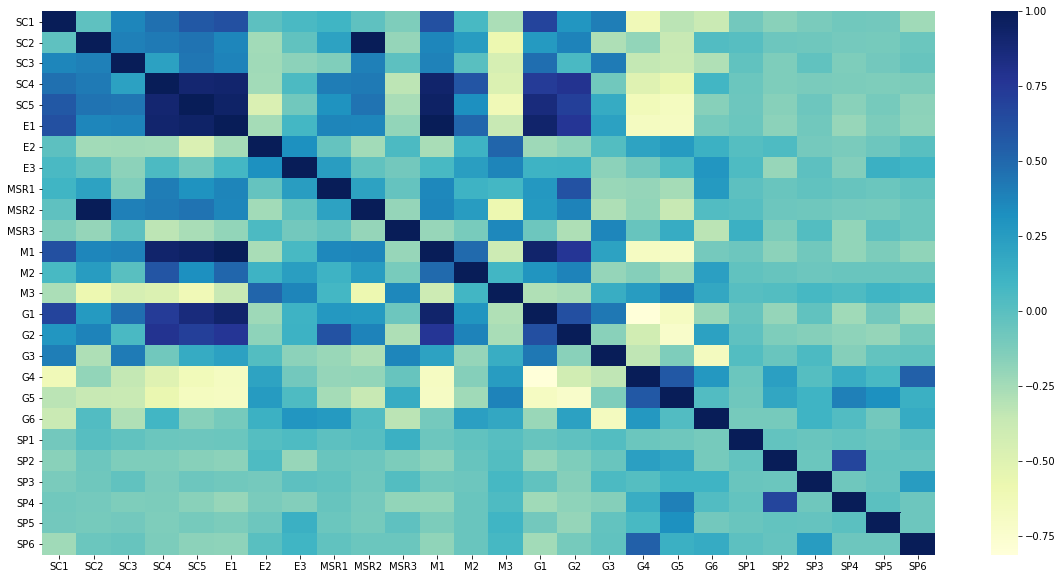

In [23]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
e = df_Data_Point_scaled_noNaN.corr()
sns.heatmap(e, cmap="YlGnBu")

In [24]:
from __future__ import print_function
import sys
import numpy
numpy.set_printoptions(linewidth=1000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Do the PCA.

n=5
pca = PCA(n_components=n, random_state= 88)
pct = pca.fit_transform(df_Data_Point_scaled_noNaN)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df_Data_Point_scaled_noNaN['PC' + str(i + 1)] = pct[:, i]

display(df_Data_Point_scaled_noNaN.head())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3,G1,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6,PC1,PC2,PC3,PC4,PC5
1625,0.515375,0.401432,0.279276,1.000000,0.724610,1.000000,0.4250,0.9,0.073133,0.401432,0.217391,1.000000,1.000000,1.000000,0.974972,0.657777,0.137525,0.038550,0.011153,0.541322,0.000308,0.000011,0.001017,6.905206e-05,0.000440,0.005907,1.588140,0.927795,0.040503,0.090463,-0.154080
24539,0.385448,1.000000,1.000000,0.528108,0.802106,0.496997,0.0000,0.0,0.075193,1.000000,0.000000,0.522733,0.000000,0.000000,0.633783,0.321567,0.000000,0.059277,0.000615,0.104407,0.000000,0.000000,0.000091,7.871712e-07,0.000000,0.000000,1.205244,-0.058672,1.326754,-0.233334,0.970564
24581,0.267215,0.068282,0.071666,0.034272,0.098751,0.098225,0.3250,1.0,0.000515,0.068282,0.159420,0.102184,0.014193,0.951613,0.238542,0.264483,0.072312,0.258405,0.096960,0.543733,0.002989,0.000015,0.009716,3.982688e-05,0.001365,0.002228,-0.266288,0.638704,-0.083443,-0.078691,0.119662
24586,0.494586,0.115088,0.083118,0.067753,0.146524,0.171869,0.3625,0.9,0.053047,0.115088,0.289855,0.171869,0.023964,1.000000,0.420833,0.133076,0.139347,0.090088,0.423021,0.314895,0.000928,0.001803,0.000915,3.085582e-07,0.012063,0.000553,-0.130981,0.366206,-0.232554,0.103247,0.144013
24585,0.467302,0.072137,0.015515,0.059609,0.088154,0.149564,0.5375,0.6,0.043433,0.072137,0.188406,0.149564,0.031369,1.000000,0.335136,0.105872,0.257706,0.243727,0.448091,0.276303,0.000080,0.003395,0.000617,2.195861e-04,0.027734,0.000961,-0.278195,0.173742,-0.078068,0.122864,0.014553


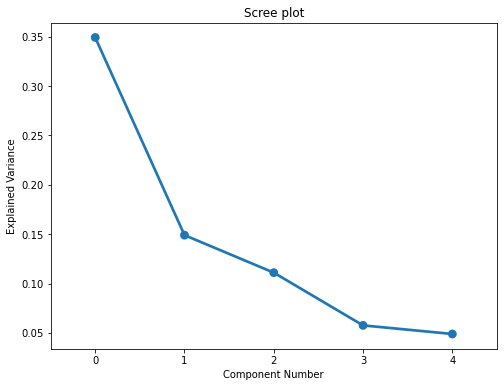

In [25]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [26]:
check_loadings_pca = pca.components_
check_eigenValues_pca = pca.explained_variance_ratio_
df_Data_Point_scaled_noNaN_check_pca = df_Data_Point_scaled_noNaN.reindex(columns=df_Learners_2.columns)

In [27]:
num_pc = 5
check_pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
check_loadings_df = pd.DataFrame.from_dict(dict(zip(check_pc_list, check_loadings_pca)))
check_loadings_df['variable'] = df_Data_Point_scaled_noNaN_check_pca.columns.values
check_loadings_df = check_loadings_df.set_index('variable')
check_loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
SC1,0.221381,-0.120373,-0.170108,0.274756,-0.026123
SC2,0.108279,0.084184,0.197527,-0.116615,0.359868
SC3,0.159003,-0.192346,0.028993,-0.120338,0.337670
SC4,0.300510,0.148950,0.118143,0.093585,-0.121183
SC5,0.341107,-0.001018,0.111283,0.043504,-0.027853
E1,0.348688,0.044448,-0.021972,0.047509,-0.117073
E2,-0.065826,0.058266,-0.158963,0.030937,-0.013511
E3,0.017489,0.556395,-0.655419,0.073229,0.280391
MSR1,0.077814,0.153098,-0.009167,-0.014574,-0.120586


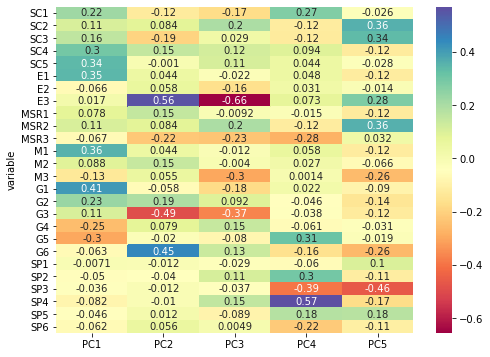

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(check_loadings_df, annot=True, cmap='Spectral')
plt.show()

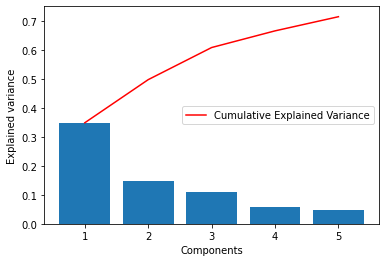

In [29]:
plt.bar(range(1, len(check_eigenValues_pca)+1), check_eigenValues_pca)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(check_eigenValues_pca)+1),
         np.cumsum(check_eigenValues_pca),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='center right')

In [53]:
x = df_Data_Point_scaled_noNaN['PC1'].astype('float32')
y = df_Data_Point_scaled_noNaN['PC2'].astype('float32')
z = df_Data_Point_scaled_noNaN['PC3'].astype('float32')
%matplotlib

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c='blue',                            # marker colour
       #marker='o',                   # marker shape
       s=60,                         # marker size
       cmap='viridis'
       )

plt.show()

Using matplotlib backend: Qt5Agg


In [31]:
df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.drop(columns =['PC4', 'PC5']) 

In [54]:
# Plot a variable factor map for the first three dimensions.
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
%matplotlib


class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''
    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

    
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim(0,2)
for i in range(0, len(df_Learners_2.columns)):          # Each PCA's number of features
    ax.arrow3D(0,0,0,
               pca.components_[0, i] * 3, pca.components_[1, i] * 3, pca.components_[2, i] * 3,
               mutation_scale=20,
               arrowstyle="->",
               linestyle='dashed')               
    if i < 12:
        annotate3D(ax, df_Learners_2.columns[i], 
        (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
        fontsize=10, xytext=(-3,3), textcoords='offset points', c='orangered', ha='right',va='bottom')
    elif i < 19:
        annotate3D(ax, df_Learners_2.columns[i], 
               (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
               fontsize=10, xytext=(-3,3), textcoords='offset points', c='dodgerblue', ha='right',va='bottom')        
    elif i < 25:
        annotate3D(ax, df_Learners_2.columns[i], 
        (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
        fontsize=10, xytext=(-3,3), textcoords='offset points', c='forestgreen', ha='right',va='bottom') 
    elif i < 27: 
        annotate3D(ax, df_Learners_2.columns[i], 
        (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
        fontsize=10, xytext=(-3,3), textcoords='offset points', c='goldenrod', ha='right',va='bottom') 
    elif i < 31: 
        annotate3D(ax, df_Learners_2.columns[i], 
        (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
        fontsize=10, xytext=(-3,3), textcoords='offset points', c='beige', ha='right',va='bottom')      
    else:  
        annotate3D(ax, df_Learners_2.columns[i], 
        (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
        fontsize=10, xytext=(-3,3), textcoords='offset points', c='violet', ha='right',va='bottom')  

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


plt.show()

Using matplotlib backend: Qt5Agg


In [33]:
df_Data_Point_scaled_noNaN_0_new = df_Data_Point_scaled_noNaN.iloc[:, -3:]
df_Data_Point_scaled_noNaN_0_new

,PC1,PC2,PC3
1625,1.588140,0.927795,0.040503
24539,1.205244,-0.058672,1.326754
24581,-0.266288,0.638704,-0.083443
24586,-0.130981,0.366206,-0.232554
24585,-0.278195,0.173742,-0.078068
8976,-0.567126,0.281615,0.188983
24603,-0.112766,0.102545,0.104365
24606,-0.505579,0.227714,-0.235544
24589,-0.633405,0.654622,-0.027178
24614,-0.129683,0.143860,-0.628770


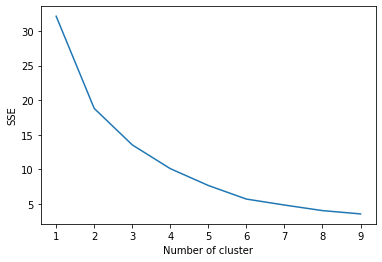

In [34]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Data_Point_scaled_noNaN_0_new)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [55]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib


kmeans = KMeans(n_clusters=3)
kmeans.fit(df_Data_Point_scaled_noNaN_0_new)
y_kmeans = kmeans.predict(df_Data_Point_scaled_noNaN_0_new)
c = y_kmeans.astype('float32')
x = df_Data_Point_scaled_noNaN_0_new['PC1'].astype('float32')
y = df_Data_Point_scaled_noNaN_0_new['PC2'].astype('float32')
z = df_Data_Point_scaled_noNaN_0_new['PC3'].astype('float32')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c=c,                            # marker colour
       #marker='o',                   # marker shape
       s=60,                         # marker size
       cmap='viridis'
       )

plt.show()

Using matplotlib backend: Qt5Agg


In [36]:
centers = kmeans.cluster_centers_
centers

array([[-0.35692228,  0.06814264,  0.0286752 ],
       [ 0.4436118 , -0.28877198, -0.26134041],
       [ 1.27368083,  0.2874372 ,  0.48449373]])

In [73]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
%matplotlib



    
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c=c,                            # marker colour
       #marker='o',                   # marker shape
       s=40,                         # marker size
       cmap='viridis'
       )

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=125, alpha=0.5)
n = ['cluster 1', 'cluster 2', 'cluster 3']
for i, txt in enumerate(n):
    annotate3D(ax, txt, centers[i, :], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')

plt.show()

Using matplotlib backend: Qt5Agg


In [38]:
pca.components_

array([[ 0.22138092,  0.10827858,  0.1590034 ,  0.30050962,  0.34110661,  0.34868798, -0.06582643,  0.01748908,  0.07781402,  0.10827858, -0.06683601,  0.35605626,  0.08845975, -0.13147918,  0.41064506,  0.23376879,  0.10846829, -0.24982189, -0.29830774, -0.06322379, -0.00705292, -0.05020246, -0.0356911 , -0.08159128, -0.04635293, -0.06228882],
       [-0.12037298,  0.08418382, -0.19234552,  0.14894969, -0.00101829,  0.04444761,  0.0582655 ,  0.55639494,  0.15309795,  0.08418382, -0.22478247,  0.04433767,  0.14652749,  0.05546986, -0.0581089 ,  0.19224558, -0.49230625,  0.07900426, -0.02001522,  0.44965984, -0.01163474, -0.03952887, -0.01162324, -0.01046351,  0.0117001 ,  0.05578184],
       [-0.17010765,  0.19752662,  0.02899268,  0.1181433 ,  0.11128276, -0.02197185, -0.15896284, -0.65541915, -0.0091665 ,  0.19752662, -0.23150181, -0.01157708, -0.00396584, -0.30112499, -0.17538333,  0.09176597, -0.36734898,  0.14589371, -0.07960994,  0.13482731, -0.02949574,  0.11141337, -0.0373082 ,

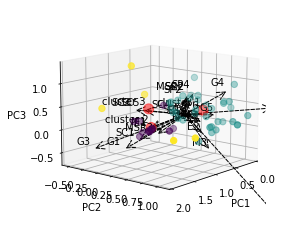

In [72]:
# Plot a variable factor map for the first three dimensions.
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim(0,2)
for i in range(0, len(df_Learners_2.columns)):          # Each PCA's number of features
    ax.arrow3D(0,0,0,
               pca.components_[0, i] * 3, pca.components_[1, i] * 3, pca.components_[2, i] * 3,
               mutation_scale=20,
               arrowstyle="->",
               linestyle='dashed')               
    annotate3D(ax, df_Learners_2.columns[i], 
               (pca.components_[0, i] * 3 + 0.001,  pca.components_[1, i] * 3 + 0.001, pca.components_[2, i] * 3 + 0.001), 
               fontsize=10, xytext=(-3,3), textcoords='offset points', ha='right',va='bottom')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c=c,                            # marker colour
       #marker='o',                   # marker shape
       s=40,                         # marker size
       cmap='viridis'
       )

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=100, alpha=0.5)
n = ['cluster 1', 'cluster 2', 'cluster 3']
for i, txt in enumerate(n):
    annotate3D(ax, txt, centers[i, :], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')

plt.show()

In [40]:
df_Data_Point_scaled_noNaN['cluster'] = y_kmeans
df_Data_Point_scaled_noNaN.head()

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3,G1,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6,PC1,PC2,PC3,cluster
1625,0.515375,0.401432,0.279276,1.000000,0.724610,1.000000,0.4250,0.9,0.073133,0.401432,0.217391,1.000000,1.000000,1.000000,0.974972,0.657777,0.137525,0.038550,0.011153,0.541322,0.000308,0.000011,0.001017,6.905206e-05,0.000440,0.005907,1.588140,0.927795,0.040503,2
24539,0.385448,1.000000,1.000000,0.528108,0.802106,0.496997,0.0000,0.0,0.075193,1.000000,0.000000,0.522733,0.000000,0.000000,0.633783,0.321567,0.000000,0.059277,0.000615,0.104407,0.000000,0.000000,0.000091,7.871712e-07,0.000000,0.000000,1.205244,-0.058672,1.326754,2
24581,0.267215,0.068282,0.071666,0.034272,0.098751,0.098225,0.3250,1.0,0.000515,0.068282,0.159420,0.102184,0.014193,0.951613,0.238542,0.264483,0.072312,0.258405,0.096960,0.543733,0.002989,0.000015,0.009716,3.982688e-05,0.001365,0.002228,-0.266288,0.638704,-0.083443,0
24586,0.494586,0.115088,0.083118,0.067753,0.146524,0.171869,0.3625,0.9,0.053047,0.115088,0.289855,0.171869,0.023964,1.000000,0.420833,0.133076,0.139347,0.090088,0.423021,0.314895,0.000928,0.001803,0.000915,3.085582e-07,0.012063,0.000553,-0.130981,0.366206,-0.232554,0
24585,0.467302,0.072137,0.015515,0.059609,0.088154,0.149564,0.5375,0.6,0.043433,0.072137,0.188406,0.149564,0.031369,1.000000,0.335136,0.105872,0.257706,0.243727,0.448091,0.276303,0.000080,0.003395,0.000617,2.195861e-04,0.027734,0.000961,-0.278195,0.173742,-0.078068,0


In [41]:
cluster_1 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 0]
cluster_2 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 1]
cluster_3 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 2]

In [71]:
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)

(34, 30)
(13, 30)
(5, 30)


In [42]:
mean_cluster_1 = cluster_1.mean() #defult: axis = 0??
mean_cluster_2 = cluster_2.mean() 
mean_cluster_3 = cluster_3.mean() 

In [43]:
list_mean_cluster_1 = mean_cluster_1.tolist() 
list_mean_cluster_2 = mean_cluster_2.tolist() 
list_mean_cluster_3 = mean_cluster_3.tolist() 

In [69]:
df_cluster = pd.DataFrame(columns = df_Data_Point_scaled_noNaN.columns)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_1, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_2, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_3, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster

,SC1,SC2,SC3,SC4,SC5,E1,E2,E3,MSR1,MSR2,MSR3,M1,M2,M3,G1,G2,G3,G4,G5,G6,SP1,SP2,SP3,SP4,SP5,SP6,PC1,PC2,PC3,cluster
0,0.299722,0.087264,0.119777,0.050317,0.105661,0.115227,0.362500,0.505882,0.061479,0.087264,0.346121,0.119594,0.029155,0.984345,0.262683,0.125059,0.318976,0.295150,0.431729,0.298017,0.031338,0.041761,0.091080,0.063525,0.072504,0.065843,-0.356922,0.068143,0.028675,0.0
1,0.585468,0.112716,0.403285,0.156126,0.338985,0.378253,0.303846,0.538462,0.069343,0.112716,0.412486,0.386628,0.021163,0.962779,0.681006,0.224828,0.726457,0.067084,0.215597,0.095358,0.000403,0.000352,0.048811,0.000158,0.061093,0.022500,0.443612,-0.288772,-0.261340,1.0
2,0.620009,0.332269,0.296712,0.710621,0.758123,0.710730,0.185000,0.360000,0.229665,0.332269,0.098551,0.731714,0.218287,0.596774,0.804607,0.591137,0.200162,0.035486,0.013769,0.295037,0.000129,0.000015,0.001117,0.000047,0.000606,0.016264,1.273681,0.287437,0.484494,2.0


In [44]:
SC = []
E = []
MSR = []
M = []
G = []
SP = []

for i in range(3):
    XYZ1 = eval('list_mean_cluster_'+str(i+1))
    XYZ1 = XYZ1[:5]
    SC.append(statistics.mean(XYZ1))
    XYZ2 = eval('list_mean_cluster_'+str(i+1))
    XYZ2 = XYZ2[5:8]
    E.append(statistics.mean(XYZ2))
    XYZ3 = eval('list_mean_cluster_'+str(i+1))
    XYZ3 = XYZ3[8:11]
    MSR.append(statistics.mean(XYZ3))
    XYZ4 = eval('list_mean_cluster_'+str(i+1))
    XYZ4 = XYZ4[11:14]
    M.append(statistics.mean(XYZ4))
    XYZ5 = eval('list_mean_cluster_'+str(i+1))
    XYZ5 = XYZ5[14:20]
    G.append(statistics.mean(XYZ5))
    XYZ6 = eval('list_mean_cluster_'+str(i+1))
    XYZ6 = XYZ6[20:26]
    SP.append(statistics.mean(XYZ6))


In [45]:
print(G)
print(SC)
print(E)
print(MSR)
print(SP)
print(M)

[0.2886025913116545, 0.3350550030201458, 0.323366456689206]
[0.1325481064963819, 0.3193160606385452, 0.543546804256687]
[0.3278697205423017, 0.4068533991194675, 0.41857661343539665]
[0.16495467376114162, 0.1981817035408096, 0.22016156105204787]
[0.061008429672886985, 0.022219309221301654, 0.0030297095669938774]
[0.37769791101001776, 0.4568567843261757, 0.5155917098213372]


In [46]:
Learners = {}
for i in range(3):
    Learners['Persona'+str(i+1)] = [G[i], SC[i], E[i], MSR[i], SP[i], M[i]]

Learners

{'Persona1': [0.2886025913116545,
  0.1325481064963819,
  0.3278697205423017,
  0.16495467376114162,
  0.061008429672886985,
  0.37769791101001776],
 'Persona2': [0.3350550030201458,
  0.3193160606385452,
  0.4068533991194675,
  0.1981817035408096,
  0.022219309221301654,
  0.4568567843261757],
 'Persona3': [0.323366456689206,
  0.543546804256687,
  0.41857661343539665,
  0.22016156105204787,
  0.0030297095669938774,
  0.5155917098213372]}

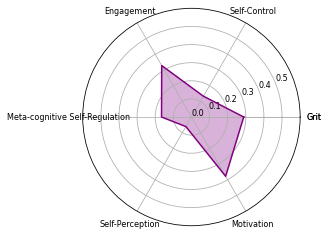

In [47]:
from math import pi
%matplotlib inline 

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles0 = [(n / float(N))*2*pi for n in range(N)]

Learners['Persona1'] += Learners['Persona1'][:1]    # link tail with head
angles0 += angles0[:1]    # link tail with head
categories += categories[:1]    # link tail with head

plt.polar(angles0, Learners['Persona1'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona1'], 'purple', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.6)
axes.set_yticks(np.arange(0,0.6,0.1))


plt.show()

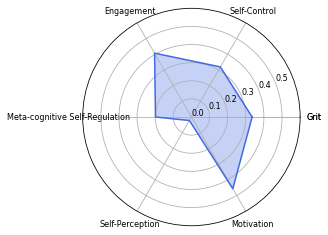

In [48]:
Learners['Persona2'] += Learners['Persona2'][:1]    # link tail with head

plt.polar(angles0, Learners['Persona2'], 'royalblue')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona2'], 'royalblue', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.6)
axes.set_yticks(np.arange(0,0.6,0.1))

plt.show()

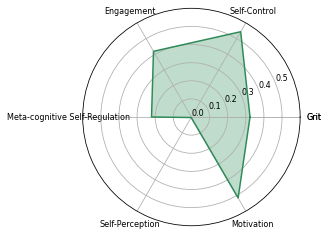

In [49]:
Learners['Persona3'] += Learners['Persona3'][:1]    # link tail with head

plt.polar(angles0, Learners['Persona3'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona3'], 'seagreen', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.6)
axes.set_yticks(np.arange(0,0.6,0.1))

plt.show()

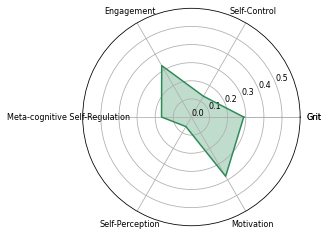

In [74]:
%matplotlib inline 

plt.polar(angles0, Learners['Persona1'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona1'], 'seagreen', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.6)
axes.set_yticks(np.arange(0,0.6,0.1))


plt.show()


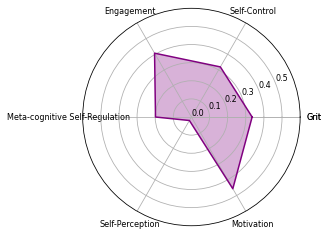

In [75]:
%matplotlib inline 

plt.polar(angles0, Learners['Persona2'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona2'], 'purple', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.6)
axes.set_yticks(np.arange(0,0.6,0.1))

plt.show()

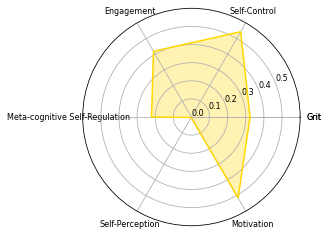

In [77]:
%matplotlib inline 

plt.polar(angles0, Learners['Persona3'], 'gold')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona3'], 'gold', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.6)
axes.set_yticks(np.arange(0,0.6,0.1))

plt.show()
